In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Import NumPy, Pandas, Matplotlib, Seaborn and other libraries 

In [2]:
import warnings

warnings.filterwarnings('ignore')

# We can suppress the warnings

Link to the dataset:

https://data.cso.ie/table/PEA11



In [3]:
df = pd.read_csv("PopulationEstimatesDatabase1.csv")

# pd.read_csv function in order to read the csv file containing the population estimated construction status report

In [4]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('PopulationEstimatesDatabase1.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('PopulationEstimatesDatabase1')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [5]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [6]:
df.info()

# Check the information of the dataframe by applying the .info() function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     11817 non-null  object
 1   Year                11817 non-null  int64 
 2   Single Year of Age  11817 non-null  object
 3   Sex                 11817 non-null  object
 4   UNIT                11817 non-null  object
 5   VALUE               11817 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 554.1+ KB


In [7]:
df.head(5)

# Print the first 5 rows of the dataframe by applying the.head() function

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,All ages,Both sexes,Number,2971992
1,Population estimates from 1926,1926,All ages,Male,Number,1506889
2,Population estimates from 1926,1926,All ages,Female,Number,1465103
3,Population estimates from 1926,1926,Under 1 year,Both sexes,Number,55391
4,Population estimates from 1926,1926,Under 1 year,Male,Number,28084


In [8]:
df.tail(5)

# Print the last 5 rows of the dataframe by applying the .tail() function

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
11812,Population estimates from 1926,2023,98 years,Male,Number,197
11813,Population estimates from 1926,2023,98 years,Female,Number,632
11814,Population estimates from 1926,2023,99 years and over,Both sexes,Number,1600
11815,Population estimates from 1926,2023,99 years and over,Male,Number,352
11816,Population estimates from 1926,2023,99 years and over,Female,Number,1248


In [9]:
df.shape

# The number of rows and columns of the dataframe by applying the .shape function

(11817, 6)

This dataframe contains 11817 rows and 6 columns

In [10]:
df.dtypes

# The data types of the dataframe by applying the .dtypes attribute to the dataframe

STATISTIC Label       object
Year                   int64
Single Year of Age    object
Sex                   object
UNIT                  object
VALUE                  int64
dtype: object

In [11]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['STATISTIC Label', 'Year', 'Single Year of Age', 'Sex', 'UNIT',
       'VALUE'],
      dtype='object')

In [12]:
df.drop(columns=["STATISTIC Label", "UNIT"], inplace=True)

# Apply .drop() to remove the spesific column as it contains the same index values

In [13]:
df.head(5)

,Year,Single Year of Age,Sex,VALUE
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [14]:
df = df.rename(columns={'Single Year of Age': 'Single_Year_of_Age','VALUE': 'Value'})

# To correct only the "VALUE" spelling in columns-Rename the columns of the dataframe by applying the .rename() method,
# spaces between words in column names have been replaced by "_" in order to Other columns are suitable.

In [15]:
df.columns

Index(['Year', 'Single_Year_of_Age', 'Sex', 'Value'], dtype='object')

In [16]:
df.head(5)

,Year,Single_Year_of_Age,Sex,Value
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [17]:
df.describe(include = "object")

,Single_Year_of_Age,Sex
count,11817,11817
unique,101,3
top,All ages,Both sexes
freq,117,3939


In [18]:
df.head(5)

,Year,Single_Year_of_Age,Sex,Value
0,1926,All ages,Both sexes,2971992
1,1926,All ages,Male,1506889
2,1926,All ages,Female,1465103
3,1926,Under 1 year,Both sexes,55391
4,1926,Under 1 year,Male,28084


In [19]:
df_frame = pd.DataFrame(df)

df1 = df_frame[(df_frame['Single_Year_of_Age'] == 'All ages') & (df_frame['Sex'] == 'Both sexes')]

print(df1)

# Select only the row with 'All ages' and 'Both Sexes' and the matching column 'value'
# and print

       Year Single_Year_of_Age         Sex    Value
0      1926           All ages  Both sexes  2971992
303    1936           All ages  Both sexes  2968420
606    1946           All ages  Both sexes  2955107
909    1951           All ages  Both sexes  2960593
1212   1961           All ages  Both sexes  2818341
1515   1966           All ages  Both sexes  2884002
1818   1971           All ages  Both sexes  2978248
2121   1979           All ages  Both sexes  3368217
2424   1981           All ages  Both sexes  3443405
2727   1986           All ages  Both sexes  3540643
3030   1991           All ages  Both sexes  3525719
3333   1996           All ages  Both sexes  3626087
3636   1997           All ages  Both sexes  3664313
3939   1998           All ages  Both sexes  3703082
4242   1999           All ages  Both sexes  3741647
4545   2000           All ages  Both sexes  3789536
4848   2001           All ages  Both sexes  3847198
5151   2002           All ages  Both sexes  3917203
5454   2003 

Our aim here is to prevent the evaluations from being accurate since the total year of data and the separately stated values are shown as a whole in the single year of age column.

We will ensure that the evaluations will accurate results by creating new data frames separately.

In [20]:
df2 = df_frame.drop(df_frame[(df_frame['Sex'] == 'Both sexes')].index)

print(df2)


       Year Single_Year_of_Age     Sex    Value
1      1926           All ages    Male  1506889
2      1926           All ages  Female  1465103
4      1926       Under 1 year    Male    28084
5      1926       Under 1 year  Female    27307
7      1926             1 year    Male    28374
...     ...                ...     ...      ...
11810  2023           97 years  Female      821
11812  2023           98 years    Male      197
11813  2023           98 years  Female      632
11815  2023  99 years and over    Male      352
11816  2023  99 years and over  Female     1248

[7878 rows x 4 columns]


In [21]:
df2_frame = pd.DataFrame(df2)

df3 = df2_frame.drop(df2_frame[(df2_frame['Single_Year_of_Age'] == 'All ages')].index)

print(df3)

       Year Single_Year_of_Age     Sex  Value
4      1926       Under 1 year    Male  28084
5      1926       Under 1 year  Female  27307
7      1926             1 year    Male  28374
8      1926             1 year  Female  27502
10     1926            2 years    Male  29728
...     ...                ...     ...    ...
11810  2023           97 years  Female    821
11812  2023           98 years    Male    197
11813  2023           98 years  Female    632
11815  2023  99 years and over    Male    352
11816  2023  99 years and over  Female   1248

[7800 rows x 4 columns]


df data set is the data set that contains all the data. After data editing, another data set was created for graphics and evaluations,

df1 data set is a data set showing the total population of Ireland for both genders by years.

df2 data set was used to create the df3 data set, df3 data set shows the population totals of male and female genders according to each age.

Necessary adjustments were made to obtain more consistent estimates from the data sets.

In [22]:
l_encoder = LabelEncoder()

# Put the type of all data of object type into the same shape (float).with the Encoder function.

In [23]:
df["Sex_Encoded"] = l_encoder.fit_transform(df["Sex"])

In [24]:
df["Single_Year_of_Age_Encoded"] = l_encoder.fit_transform(df["Single_Year_of_Age"])

In [25]:
df.drop(columns=["Single_Year_of_Age", "Sex"], inplace=True)

In [26]:
df1["Sex_Encoded"] = l_encoder.fit_transform(df1["Sex"])

In [27]:
df1["Single_Year_of_Age_Encoded"] = l_encoder.fit_transform(df1["Single_Year_of_Age"])

In [28]:
df1.drop(columns=["Single_Year_of_Age", "Sex","Single_Year_of_Age_Encoded", "Sex_Encoded"], inplace=True)

In [29]:
df3["Sex_Encoded"] = l_encoder.fit_transform(df3["Sex"])

In [30]:
df3["Single_Year_of_Age_Encoded"] = l_encoder.fit_transform(df3["Single_Year_of_Age"])

In [31]:
df3.drop(columns=["Single_Year_of_Age", "Sex"], inplace=True)

In [32]:
df.head(5)

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,2971992,0,99
1,1926,1506889,2,99
2,1926,1465103,1,99
3,1926,55391,0,100
4,1926,28084,2,100


In [33]:
df1.head(5)

,Year,Value
0,1926,2971992
303,1936,2968420
606,1946,2955107
909,1951,2960593
1212,1961,2818341


In [34]:
df3.head(5)

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
4,1926,28084,1,99
5,1926,27307,0,99
7,1926,28374,1,0
8,1926,27502,0,0
10,1926,29728,1,11


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        11817 non-null  int64
 1   Value                       11817 non-null  int64
 2   Sex_Encoded                 11817 non-null  int32
 3   Single_Year_of_Age_Encoded  11817 non-null  int32
dtypes: int32(2), int64(2)
memory usage: 277.1 KB


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7800 entries, 4 to 11816
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Year                        7800 non-null   int64
 1   Value                       7800 non-null   int64
 2   Sex_Encoded                 7800 non-null   int32
 3   Single_Year_of_Age_Encoded  7800 non-null   int32
dtypes: int32(2), int64(2)
memory usage: 243.8 KB


In [37]:
df.shape

(11817, 4)

In [38]:
df1.shape

(39, 2)

In [39]:
df3.shape

(7800, 4)

In [40]:
df1.describe().T

# Apply .describe().T to check the mean, standard deviation, and quantiles of all the columns in the nh dataframe

,count,mean,std,min,25%,50%,75%,max
Year,39.0,1.996410e+03,24.78191,1926.0,1988.5,2004.0,2013.5,2023.0
Value,39.0,4.054490e+06,737168.69898,2818341.0,3533181.0,4045188.0,4630054.5,5281612.0


Year vary from 1926 to 2023. Value vary from 281834 to 5281612 with a mean of 4.054490 and a standard deviation of 737168.69 which means this shows that the range is very large. We can say that we need to do a prediction success test in order to say that we have enough prediction information to make a successful prediction

In [41]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7800.0,1996.410256,24.463698,1926.0,1986.00,2004.0,2014.00,2023.0
Value,7800.0,20272.447821,11910.053644,6.0,10576.75,22863.0,30243.00,44954.0
Sex_Encoded,7800.0,0.500000,0.500032,0.0,0.00,0.5,1.00,1.0
Single_Year_of_Age_Encoded,7800.0,49.500000,28.867921,0.0,24.75,49.5,74.25,99.0


Year vary from 1926 to 2023. Value vary from 6 to 44954 with a mean of 20272.44 and a standard deviation of 11910.053 which means this shows that the range is very large. We can say that we need to do a prediction success test in order to say that we have enough prediction information to make a successful prediction.

In [42]:
df3.melt()

# .melt() function for changing and seeing values and variable 

,variable,value
0,Year,1926
1,Year,1926
2,Year,1926
3,Year,1926
4,Year,1926
...,...,...
31195,Single_Year_of_Age_Encoded,96
31196,Single_Year_of_Age_Encoded,97
31197,Single_Year_of_Age_Encoded,97
31198,Single_Year_of_Age_Encoded,98


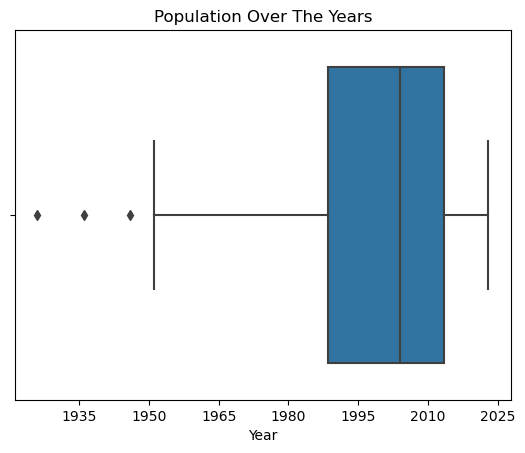

In [43]:
import matplotlib.ticker as ticker

sns.boxplot(data=df1, x='Year')

plt.title('Population Over The Years')

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

# Import the `ticker` module from the `matplotlib` library
# Apply sns.boxplot to visualize the age range of the population by year. Use the 'Year' dataframe 
# as the data source and specify 'Population Over The Years' as the column by which to group the data.
# Set the title of the box plot using the plt.title() function
# Convert the years in the y-axis to integers for better visualization
# Apply the .gca() method to get the current axes and apply the xaxis attribute set the x-axis tick locator to display
# integers only
# Call the plt.show() function to display the box plot

In this box plot we can see that the population density was between after 1980 and after 2010. On the x-axis, two outliers that require further investigation are observed.

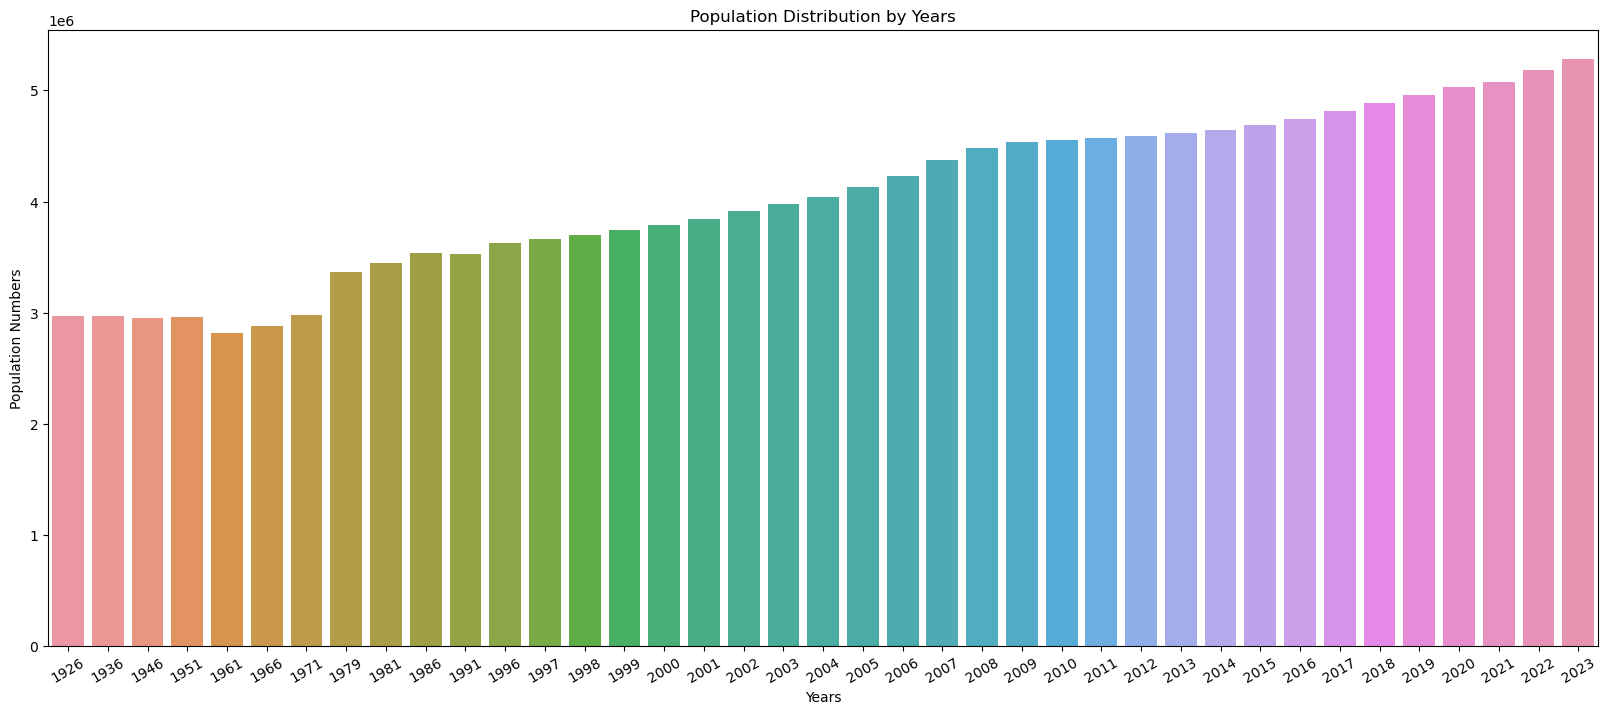

In [44]:
Years_Value = df1.groupby('Year')['Value'].sum().reset_index()

Years_Value = Years_Value.sort_values('Value', ascending=False)

plt.figure(figsize=(20, 8))

sns.barplot(data=Years_Value, x='Year', y='Value')

plt.title('Population Distribution by Years')
plt.xlabel('Years')
plt.ylabel('Population Numbers')

plt.xticks(rotation=30)

plt.show()

#Calculate the number of population by year and store the result in a new data frame called Years_Value
# Sort the Years_Value data frame in descending order by total number of units
# I found the shape size by experimenting due to the size of the data set.
# Create a count chart to visualize data
# the title, x label and y label of the chart by applying plt.title() function, plt.xlabel() function,
# and use plt.ylabel() function 
# Rotate x-axis labels using xticks() for better readability
# View the drawing using the Show() function
# View the drawing using the Show() function

Visualized that the population has increased in Dublin over the years.To understand the years with the highest population, examine the 10 years with the highest population.

In [45]:
Population = df1['Year'].value_counts()

In [46]:
top10 = Population.head(10).index.tolist()

In [47]:
top10

[1926, 2014, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015]

In [48]:
top10_Years = df1[df1['Year'].isin(top10)]

# Filter the Value dataframe by the first 10 years by applying the .isin() method

In [49]:
top10_Years.groupby('Year')['Value'].sum().sort_values(ascending=False)

Year
2015    4687787
2014    4645440
2013    4614669
2012    4593697
2011    4574888
2010    4554763
2009    4533395
2008    4485070
2007    4375842
1926    2971992
Name: Value, dtype: int64

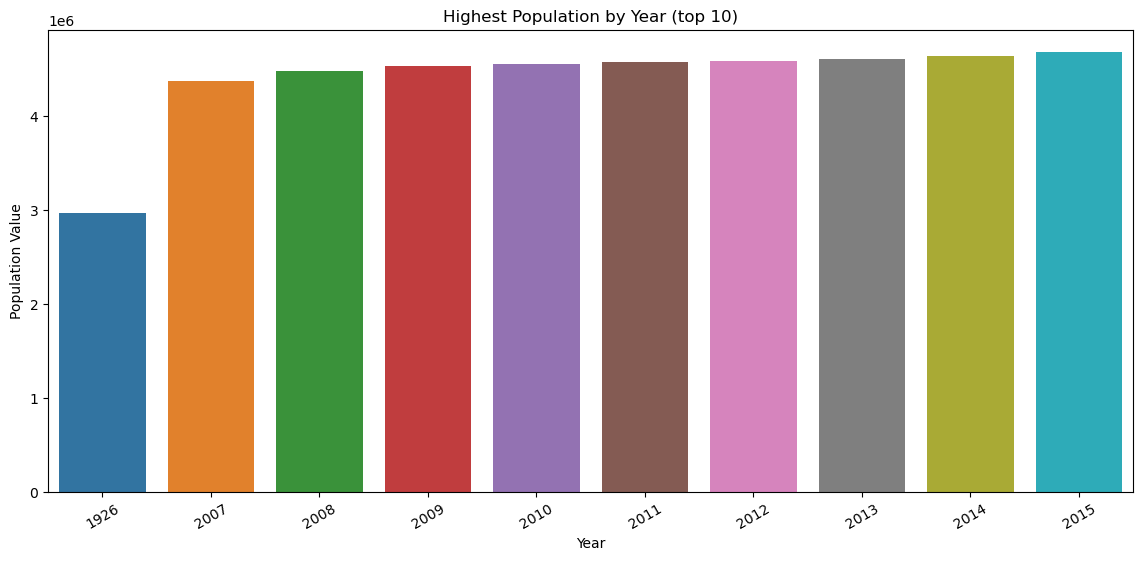

In [50]:
top10_Years_Value = top10_Years.groupby('Year')['Value'].sum().reset_index()

top10_Years_Value = top10_Years_Value.sort_values('Value', ascending=False)

plt.figure(figsize=(14, 6))

sns.barplot(x='Year', y='Value', data = top10_Years_Value)

plt.title('Highest Population by Year (top 10)')
plt.xlabel('Year')
plt.ylabel('Population Value')

plt.xticks(rotation=30)

plt.show()

# Calculate the number of population units and store the result in a new data frame called top10_Years_Value 
# Sort the top10_Years_Value  data frame in descending order by total number of units
# We find the shape size by trying
# Create a count chart to visualize high population years
# Set the title, x label and y label of the chart by applying plt.title() function, plt.xlabel() function,
# and use plt.ylabel() function
# Rotate x-axis labels using xticks() for better readability
# View the drawing using the Show() function

There is no significant difference between the number of high population units in Dublin City and the number of units in the other top 10 population values. Only a lower value was observed in the first year compared to the other years.

We can also express the relevant observation as follows; except for the first observation, there is no difference between the other observations.

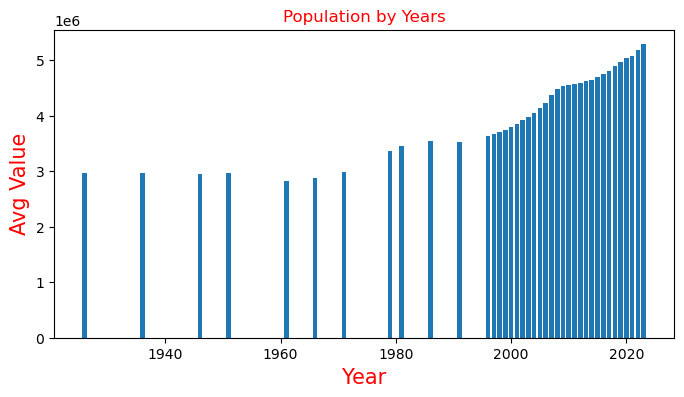

In [51]:
plt.figure(figsize=(8, 4))
plt.bar(df1.groupby('Year')['Year'].count().index,df1.groupby('Year')['Value'].mean())
plt.xlabel("Year",fontsize=15, color='Red')
plt.ylabel("Avg Value",fontsize=15,color='Red')
plt.title("Population by Years",color='Red')
plt.show()


# Create a histogram plot using Seaborn
# the figure size to (8,4) inches by applying the plt.figure() function with the figsize attribute
# Display the plot by calling the the plt.show() function, sns.histplot() function from Seaborn, specify 'Value' as the dataframe containing the data to be plotted,specify 
# 'Year' as the column name in the dataframe to be plotted on the x-axis,
# defines the number of bins (15) to use in the histogram plot. The number of bins have been choses based on different attempts
# with the aim of  of providing sufficient detail to capture important patterns in the data while maintaining visual clarity
# and avoiding excessive noise or oversimplification.

From this histogram, we can observe that the majority of projects (almost 70000) approved from after 2020 units. This is the most common range of units within the dataset. The histogram appears skewed to the right, and this should be taken into account for future possible analysis.

# MACHINE LEARNING

In [52]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

from sklearn.metrics import r2_score
from sklearn import linear_model

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
# Import libraries

import pandas as pd    
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chisquare

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [53]:
df3.head()

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
4,1926,28084,1,99
5,1926,27307,0,99
7,1926,28374,1,0
8,1926,27502,0,0
10,1926,29728,1,11


In [54]:
df3.columns = ['Year', 'Value', 'Sex_Encoded', 'Single_Year_of_Age_Encoded']

df3.head()

# Assign the names to the columns of the dataset
# Display first 5 records

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
4,1926,28084,1,99
5,1926,27307,0,99
7,1926,28374,1,0
8,1926,27502,0,0
10,1926,29728,1,11


In [55]:
X = df3.drop('Value', axis=1)

y = df3[["Value"]]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [57]:
y_test.shape

(1560, 1)

In [58]:
y_train.shape

(6240, 1)

In [59]:
reg_model = LinearRegression().fit(X_train, y_train)

In [60]:
reg_model.intercept_

array([-229880.14383186])

In [61]:
reg_model.coef_[0][0]

133.2488019937845

In [62]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

6811.949004279724

In [63]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.6714689497551307

In [64]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

6784.165582124737

In [65]:
# Test RKARE
reg_model.score(X_test, y_test)

0.6806483068502346

In [66]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

7086.50487136968

In [67]:
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=10,scoring="neg_mean_squared_error")))

7086.50487136968

In [68]:
np.mean(np.sqrt(-cross_val_score(reg_model,X,y,cv=5,scoring="neg_mean_squared_error")))

7544.1103304241315

In [69]:
#The functions we will use in the future have been defined
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize)
def median(array):
    median = np.median(array)
    return print("Median:", median)
def mean(array):
    mean = np.mean(array)
    return print("Mean:", mean)
def variance(array):
    variance = np.var(array)
    return print("Variance:", variance)

In [70]:
median(df3["Value"])
mean(df3["Value"])
variance(df3["Value"])
df

Median: 22863.0
Mean: 20272.44782051282
Variance: 141831191.98061046


,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
0,1926,2971992,0,99
1,1926,1506889,2,99
2,1926,1465103,1,99
3,1926,55391,0,100
4,1926,28084,2,100
...,...,...,...,...
11812,2023,197,2,97
11813,2023,632,1,97
11814,2023,1600,0,98
11815,2023,352,2,98


In [71]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

# Method or Function for Linear Regression plot

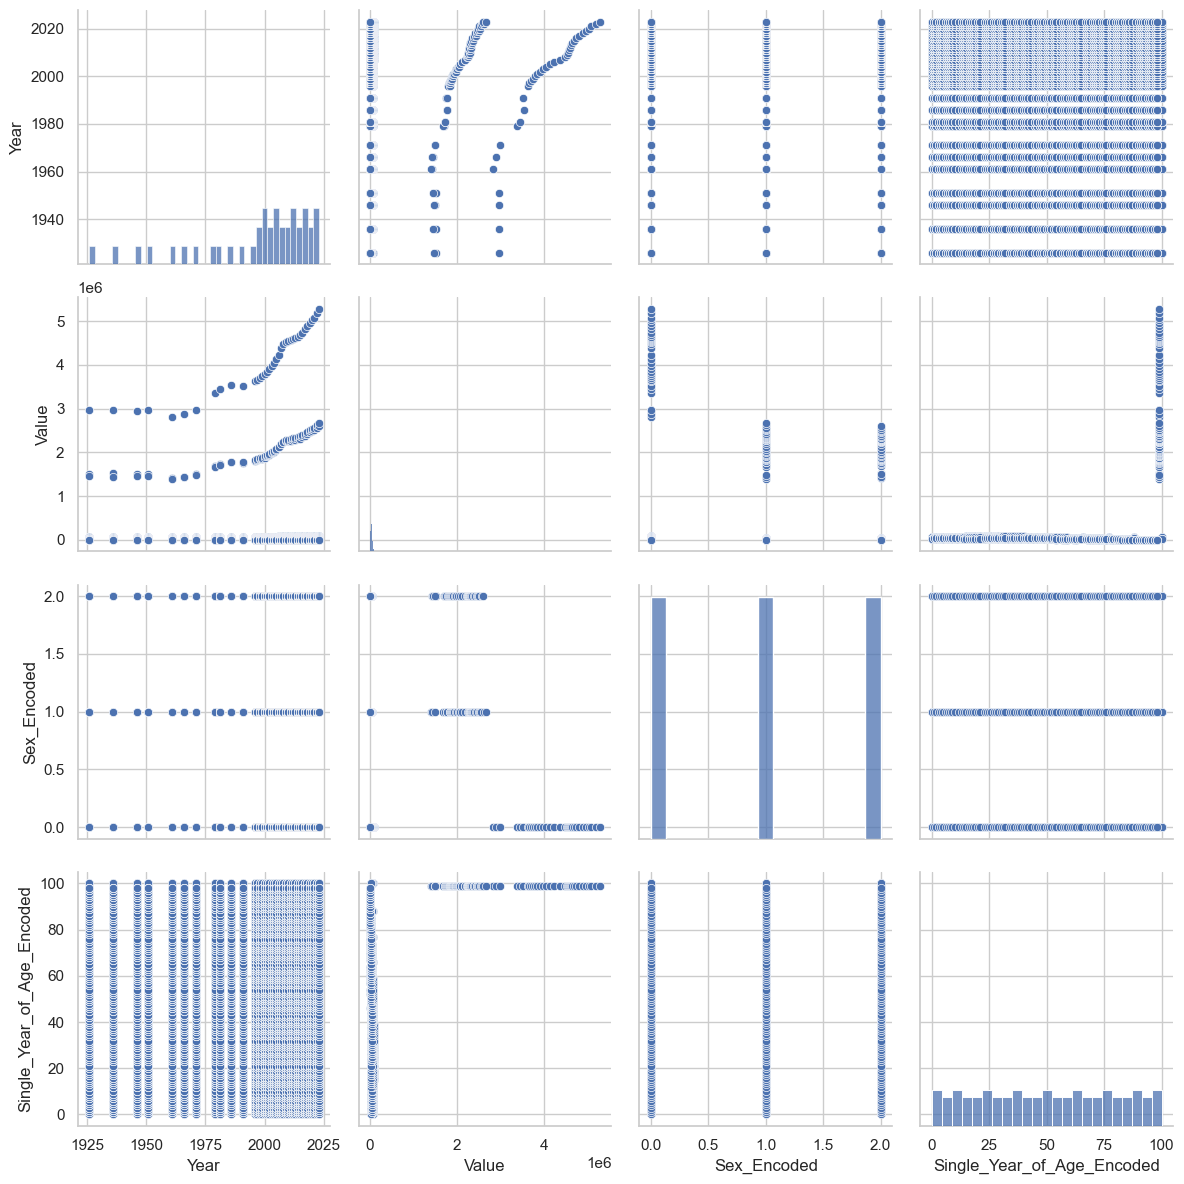

In [72]:
sns.set(style='whitegrid', context='notebook')

cols = ['Year', 'Value', 'Sex_Encoded', 'Single_Year_of_Age_Encoded']

sns.pairplot(df[cols], height = 3)

plt.tight_layout()

plt.show()

# import the libraries for the plot
# Set the style for the plot using swaborn library
# Consider the following columns from the entire dataset
# Display the pairplot using the above-mentioned columns
# plt.savefig('./figures/scatter.png', dpi=300)

# BERNOULLI AND BINOMIAL AND POISSON

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

In [74]:
!pip install empiricaldist

In [75]:
df3.head(5)

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
4,1926,28084,1,99
5,1926,27307,0,99
7,1926,28374,1,0
8,1926,27502,0,0
10,1926,29728,1,11


In [76]:
import pandas as pd
from scipy.stats import bernoulli, binom

df3 = pd.DataFrame(data)

# Bernoulli dağılımı için 'Sex_Encoded' sütunu kullanımı
p = df3['Sex_Encoded'].mean()  # Cinsiyet '1' olma olasılığı
bernoulli_dist = bernoulli(p)

# Rastgele bir sonuç elde etme
result = bernoulli_dist.rvs()
print("Random Result from Bernoulli Distribution:", result)


NameError: name 'data' is not defined

0 male and 1 female

In [ ]:
sns.set_style('white')
fig,ax=plt.subplots(figsize=(5,3))
x = [0, 1]
pmf = bernoulli_dist.pmf(x)
plt.bar(x, pmf)
plt.title('Bernoulli Distribution')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.xticks(x, ['Male', 'Female'])  
plt.show()


In [ ]:
Sex_Encoded=df3[df3['Sex_Encoded']== 1]
Sex_Encoded['Value'].value_counts(normalize=True)
n=10
p=0.30
x=np.arange(0,2)
fig,ax=plt.subplots(figsize=(8,6))
pmf=stats.binom.pmf(x,n,p)
pps=plt.bar(x,pmf)
print(pmf)
for w in pps:
    height=w.get_height()
    ax.text(x=w.get_x()+w.get_width()/2,y=height+0.001,
           s='{}%'.format(round(height,2)),ha='center',fontsize=20,color='r')
plt.locator_params(integer=True)
label_graph(15,'Gender', 'Probability', 'Binomial Distribution (n={n},p={p})',15)

## NORMAL DISTRIBUTION

In [ ]:
mean = df3['Value'].mean()
std_dev = df3['Value'].std()

normal_dist = norm(loc=mean, scale=std_dev)

#Statistical analysis of the 'Value' value found in the df3 data set
#Creating a normal distribution

plt.hist(df3['Value'], bins=5, density=True, alpha=0.6, color='g')

# Histogram distribution


x = np.linspace(df3['Value'].min(), df3['Value'].max(), 100)
plt.plot(x, normal_dist.pdf(x), 'k', linewidth=2)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

#Let's plot the normal distribution probability and density


plt.show()

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

#statistical values



# EXPERT KNOWLEDGE

In [ ]:
pip install mglearn

In [ ]:
import mglearn

In [ ]:
# Display number of rentals at different times
print("PopulationEstimatesDatabase1:\n{}".format(df3.head(20)))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the size of the data set
plt.figure(figsize = (15,3))

# Arrange the data set using date_range() method
xticks = pd.date_range(start = df3.index.min(), end = df3.index.max(), freq = 'D')

# Set the date format for the plot
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation = 20, ha = "left")
# plt.xticks(xticks, xticks.strftime("%d-%m-%d"), rotation = 90, ha = "left")

plt.plot(df3, linewidth = 1)
plt.xlabel("Year")
plt.ylabel("Population")

In [ ]:
# Example to understand reshape(-1, 1)
import numpy as np

arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)

newarr = arr.reshape(-1, 1)
print(newarr)

In [ ]:
# https://www.w3schools.com/python/trypython.asp?filename=demo_ref_math_floor
val1 = 3
val2 = 2
  
# using the floor division
res = val1 // val2
print(res)

In [ ]:
# Display the citibike values
df1.index.astype("int64").values
df1.values

In [ ]:
df1.index.astype("int64").values.reshape(-1, 1)

In [ ]:
# extract the target values (number of rentals)
y = df3.values

# convert to POSIX time by dividing by 10**9
X = df3.index.astype("int64").values.reshape(-1, 1) // 10**9

X.shape, y.shape

In [ ]:
print(X[:20])

In [ ]:
n_train = 6240

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation = 90, ha = "left")

    plt.plot(range(n_train), y_train, label = "train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label = "test")
    plt.plot(range(n_train), y_pred_train, '--', label = "prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "prediction test")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Population")

In [ ]:
print(X, y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create an object 'regressor' by calling a method RandomForestRegressor()
regressor = RandomForestRegressor(n_estimators = 945, random_state = 0)

# Call the method eval_on_features() to calculate the R^2 and plot
eval_on_features(X, y, regressor)

# RIDGE

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [ ]:
df1.head(5)

In [ ]:
df1.shape

In [ ]:
y = df1["Value"]
X = df1.drop(["Value"], axis=1)

In [ ]:
X.shape

In [ ]:
y.shape

We observe that the population has increased over the years, and on some dates the population has decreased. Migration data may need to be examined due to historical factors, economic aspects, or other reasons. We cannot make these evaluations because we do not have this data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error is one of the metrics used to measure the difference between the values predicted by a model (or estimator) and the actual (observed) values. If this metric is 0, it means that the model makes no errors. Simply, it adds the squares of the errors (losses), first takes the average, and then takes the square root.

In [ ]:
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.scatter(X,y,color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Lineer Regression Model')
plt.show()
# Draw a plot using linear regression iterations and VALUE
# SSE means 'sum of squares error'
# The number of epochs is a hyperparameter that defines the number times 
# that the learning algorithm will work through the entire training dataset. 
#One epoch means that each sample in the training dataset has 
# had an opportunity to update the internal model parameters. 
# An epoch is comprised of one or more batches.

In [ ]:
cv_results = cross_val_score(reg_all, X,y,cv=5)
print(cv_results)

In [ ]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Root Mean Squared Error: {}".format(rmse))
cv_results = cross_val_score(ridge, X, y, cv=5)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

In [ ]:
alpha_space = np.linspace(0, 1, 100)
param_grid = {'alpha': alpha_space}
ridge_grid = GridSearchCV(ridge, param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1) 
ridge_grid.fit(X_train, y_train)
print("Tuned Ridge Regression Parameters: {} ".format(ridge_grid.best_params_)) 
print("Best score is {}".format(ridge_grid.best_score_))

# YILLARA GORE NUFUSUN CORELASYON MATRISI

In [ ]:
Year = df3.loc[df['Year'] != 0]

# Filter the dataframe to select rows where the 'Year' column is not equal to 0 and store the result in a 
# new dataframe called 'Year'. This is done because missing values in all the years columns had been previously replaced by
# the value '0'.

Examine whether there is a correlation between years and population with a single independent variable. When all variables are examined, it should be checked whether the population increases or decreases according to years.

In [ ]:
Year.head()

In [ ]:
Year_of_Values = Year.groupby('Year').agg({'Value': 'sum', 'Sex_Encoded': 'count'})

Year_of_Values  = Year_of_Values .rename(columns={'Year': 'Year', 'Value': 'Years_of_Population'})

Year_of_Values.reset_index(inplace=True)

Year_of_Values

# Group the DataFrame by 'Year' and aggregate the sum of 'Value' and count of rows
# Rename the columns for clarity by applying the .rename() function
# Apply the .reset_index() method with the inplace=True attribute to reset the index to make 'Years_of_Population' a regular 
#column and make the change permanent

In [ ]:
Values_Of_Years = Year[['Value','Year']]

# Years are readjusted according to the data set 'Values_Of_Years'

In [ ]:
plt.figure(figsize=(8,4))

c= Values_Of_Years.corr()

sns.heatmap(c,annot=True)

c

# We draw a correlation heat map to see the correlation coefficient between the number of Value and Year.
# To determine the dimensions of the correlation heat map, call the plt.figure() function. I determine the dimensions by trying
# We define variable 'c' which will be a table containing correlation coefficients
# annot=True so the correlation coefficients appear in the heat map
# print 'c' to show a table with correlation coefficients

It can be observed from this heatmap that there is a very weak and close-to-zero correlation between number of Value and Year. Therefore, there is almost no linear relationship between the two variables.

# DF3 BUTUN DEGERLERLE KORELASYON MATRISI

In [ ]:
correlation = df3.corr()
print(correlation)

In [ ]:
import seaborn as sns
sns.heatmap(df3.corr(), annot = True, fmt = '.2f', linewidths = 2);

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5);

It can be observed from this heatmap that there is a very weak and close-to-zero correlation between number of units and years. Therefore, there is almost no linear relationship between the four variables.

# STATISTICS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

In [ ]:
!pip install empiricaldist

In [ ]:
df1.head(5)

In [ ]:
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize) 

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
pmf=Pmf.from_seq(df3['Sex_Encoded'])
pmf.bar()
label_graph(18,'Gender', 'PMF', 'Probability of gender', 20)

In [ ]:
import math 
import matplotlib.pyplot as pyplot

In [ ]:
def compute_binomial_probability(x, n, p):
    outcomes = math.factorial(n) / (math.factorial(x) * math.factorial(n-x))
    probability_of_each_outcome = p ** x * (1-p) ** (n-x)
    return outcomes * probability_of_each_outcome
def plot_binomial_distribution_graph(n, p):
    probabilities = list(map(lambda x: compute_binomial_probability(x,n,p), range(0,n+1)))
    pyplot.bar(list(range(0, n+1)), probabilities)
    
plot_binomial_distribution_graph(5, 0.5)

In [ ]:
!pip install empiricaldist

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
cdf3=cdf3.from_seq(df3['Value'])
cdf3.plot()
ax.annotate('25% of the Population', xy=(140000,0.24), xytext=(15000,0.06), fontsize=18, arrowprops={'arrowstyle': '->', 'lw' : 2,'color': 'b'})
plt.plot(12900,0.25, marker='o', color='r', markersize=15)
label_graph(18,'Population', 'Year', ' ',25)

In [ ]:
print('The probability of 100000 is: '+str(cdf3(10000))) ###essay

In [ ]:
print('The probability of 25% is : '+str(cdf3.inverse(0.25))) ###essay

The probability function can be written as follows:

p(0) = P(X=0) = 1-p

p(1) = P(X = 1)=p

X is called Bernoulli random variable.

In [ ]:
df3.head(5)

In [ ]:
data = {'Year'[;]:, 'Value', 'Sex_Encoded'}

In [ ]:
sns.set_style('white')
fig,ax=plt.subplots(figsize=(12,8))
probabilities=df.value_counts(normalize=True)
ax=sns.barplot(x=probabilities.index, y=probabilities.values, palette='PuBuGn_r')
patches=ax.patches
for i in range(len(patches)):
    x=patches[i].get_x()+patches[i].get_width()/2
    y=patches[i].get_height()+0.001
    ax.annotate('{:.1f}%'.format(y),(x,y),ha='center',fontsize=18)
label_graph(18,'Survived','Probability','Bernoulli Distribution', 20)

In [ ]:
sns.set_style('white')
fig,ax=plt.subplots(figsize=(12,8))
probabilities=df.value_counts(normalize=True)
ax=sns.barplot(x=probabilities.index, y=probabilities.values, palette='PuBuGn_r')
patches=ax.patches
for i in range(len(patches)):
    x=patches[i].get_x()+patches[i].get_width()/2
    y=patches[i].get_height()+0.001
    ax.annotate('{:.1f}%'.format(y),(x,y),ha='center',fontsize=18)
label_graph(18,'Survived','Probability','Bernoulli Distribution', 20)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)



In [ ]:
y = df3["Value"]
X = df3.drop(["Value"], axis=1)

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
knn_model = KNeighborsClassifier().fit(X, y)

In [ ]:
random_user = X.sample(1, random_state=245)

In [ ]:
knn_model.predict(random_user)

# MODEL BASARISINI DEGERLENDIRME

In [ ]:
# Confusion matrix için y_pred:
y_pred = knn_model.predict(X)

In [ ]:
# AUC için y_prob:
y_prob = knn_model.predict_proba(X)[:, 1]

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
cv_results['test_accuracy'].mean()

In [ ]:
knn_model.get_params()

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_params = {"n_neighbors": range(2, 100)}

In [ ]:
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(X, y)

In [ ]:
knn_gs_best.best_params_

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

In [ ]:
cv_results = cross_validate(knn_final,X,y,cv=5,scoring=["accuracy"])

In [ ]:
cv_results['test_accuracy'].mean()

In [ ]:
# basariyi nasil arttirabilirim, ilgili algoritma icin optimizasyin yapildi

In [ ]:
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

In [ ]:
y.mean()
y.std()

In [ ]:
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
mean_absolute_error(y, y_pred)

In [ ]:
mean_absolute_error(y, y_pred)

In [ ]:
reg_model.score(X, y)

In [ ]:
# Import the `ticker` module from the `matplotlib` library

import matplotlib.ticker as ticker

# Apply sns.boxplot to visualise the population by ages.

# Use the 'years' dataframe as the data source and specify 'Single_Year_of_Age_Encoded' as the column to group the data by and change the colour

sns.boxplot(data=df, x='Year')

# Set the title of the box plot using the plt.title() function

plt.title('Population by Year')

# Convert the years in the y-axis to integers for better visualization

# Apply the .gca() method to get the current axes and apply the xaxis attribute set the x-axis tick locator to display
# integers only

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Call the plt.show() function to display the box plot

plt.show()

In this boxplot, we can say that the age majority is 25-75.

In [ ]:
train_validation = df3.sample(frac = 0.8, random_state = 12345)
test = df3.drop(train_validation.index)
len(test)

We allocated 80% of the data as the training and validation set, and the remaining 20% as the test set. I stated what percentage I would divide the amount of “.example” by the accumulation of “frak”. The “random_state” command, like most commands, enables the division of progress by setting the “seed” part. The “.drop” cut in the second line throws the remaining data from the original data, except the parts we reserved for train and verification, to the test set.

In [ ]:
len(train_validation)

In [ ]:
len(test)

In the last 2 lines, we look at the line numbers in order to verify the operation. The number of rows of the train and validation set almost should be equal to 4 times the number of rows of the test set.

In [ ]:
from sklearn.linear_model import LinearRegression
y = train_validation["Value"]
x = train_validation.drop("Value", axis = 1)
lr = LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator = lr,
k_features = (1, 3),forward = True,floating = False,cv = 0)
sfs_fit = sfs.fit(X = x.values, y = y.values)
sfs_fit.subsets_

First of all, I import LinearRegression from the sklearn.linear_model module with the "import" command. The commands we will use are in this library. Then, I introduce to the program what the dependent and independent variables are for feature selection. Since "y", the dependent variable, will be the population value, I filter the number rate from the train_validation set. I assign everything else to the “x” object as estimators, that is, independent variables, by giving the necessary arguments to the “.drop” command. In the next line, I assign the method I will use for estimation to the “lr” object. Since I will be selecting features using Linear Regression, I perform this process with the “LinearRegression()” command. In the next step, I create the method for selecting the feature and assign it to the "sfs" object. The “SFS” command here is the abbreviation of “Sequential Feature Selection”, that is, the method that selects features in an incremental manner. After giving the "lr" object as an estimator in the function's arguments, I tell it to choose the best feature combination in a certain range in the "k_features" argument. Since I have 3 columns, I want it to find the best combination of variables starting from 1 to 3. The “Forward” argument being “True” means that the selection should be forward-looking, that is, by adding the features sequentially. The “Floating” argument adds an intermediate step to each step and continues the algorithm by removing variables that reduce performance. This argument was selected as “False”. Finally, when I said “cv = 0”, I stated that we did not want any cross-validation. I did not use the cross-validation method at this stage. This will allow us to see the difference clearly. After determining this method, we started the process with the “sfs.fit” command. In the last line of the code block, I used the “.subsets_” command to see the models at each step.

{1: {'feature_idx': (2,),
  'cv_scores': array([0.01508134]),
  'avg_score': 0.015081342429616673
  
I only took the first line of the result of the command, this will be enough for us. In the first step, train_validation was the second variable that minimized the average error in the set. It can be seen in the “avg_score” section that the average score for this variable is around 0.015081.

In [ ]:
scaler = StandardScaler()

df3_scale = pd.DataFrame(scaler.fit_transform(df3),columns=df3.columns)

In [ ]:
df3_scale.head()

In [ ]:
y = df3['Value']
X = df3_scale.drop(['Value'],axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

In [ ]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [ ]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

# DATA VISULATION

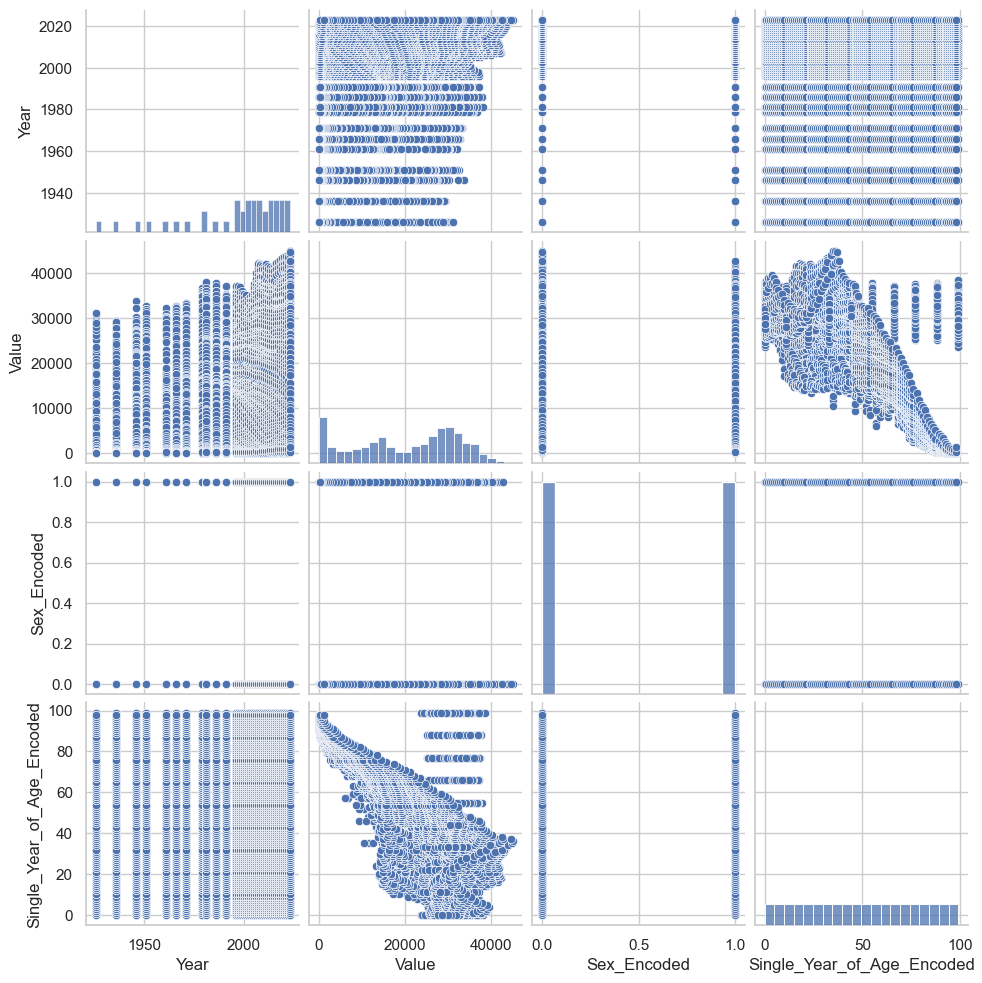

In [77]:
sns.pairplot(df3);

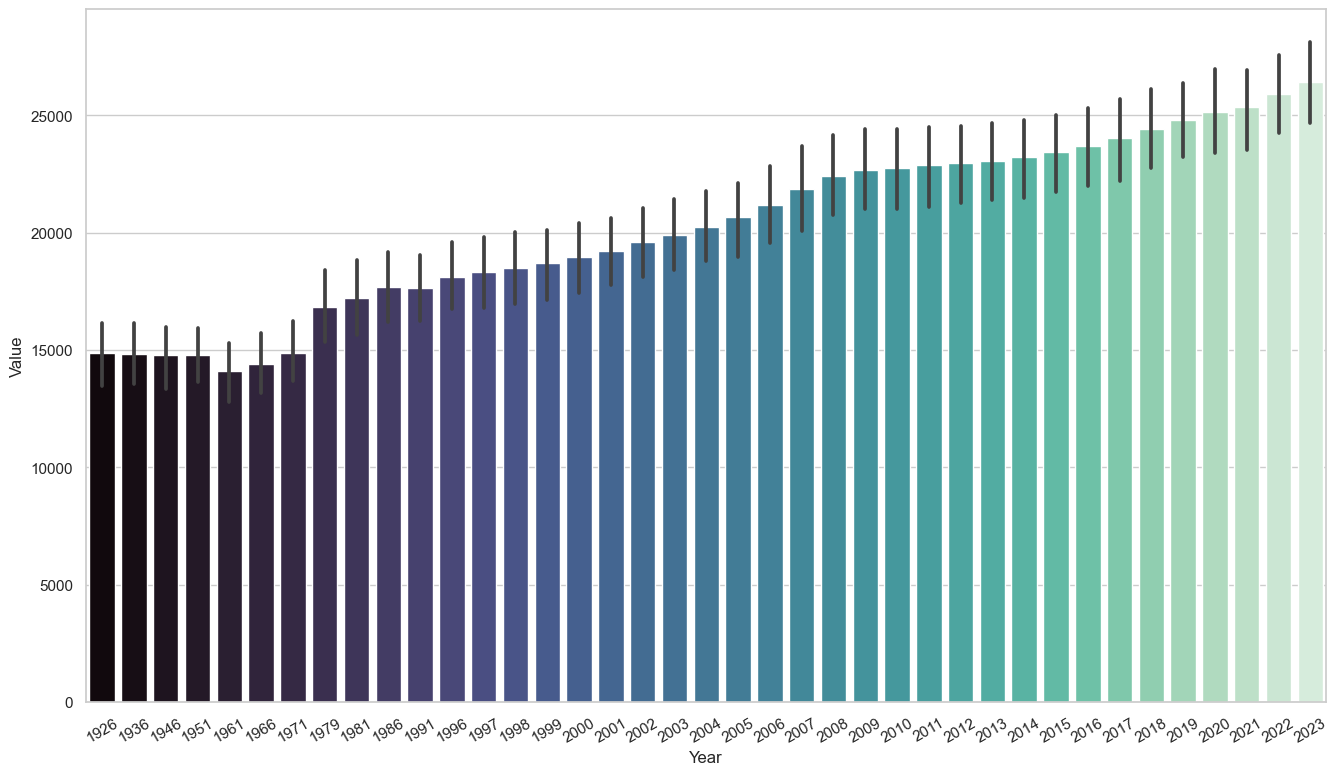

In [78]:
fig = plt.figure(figsize = (16,9))
plt.xticks(rotation=30)
sns.barplot(x ='Year', y = 'Value', palette = 'mako', data = df3);

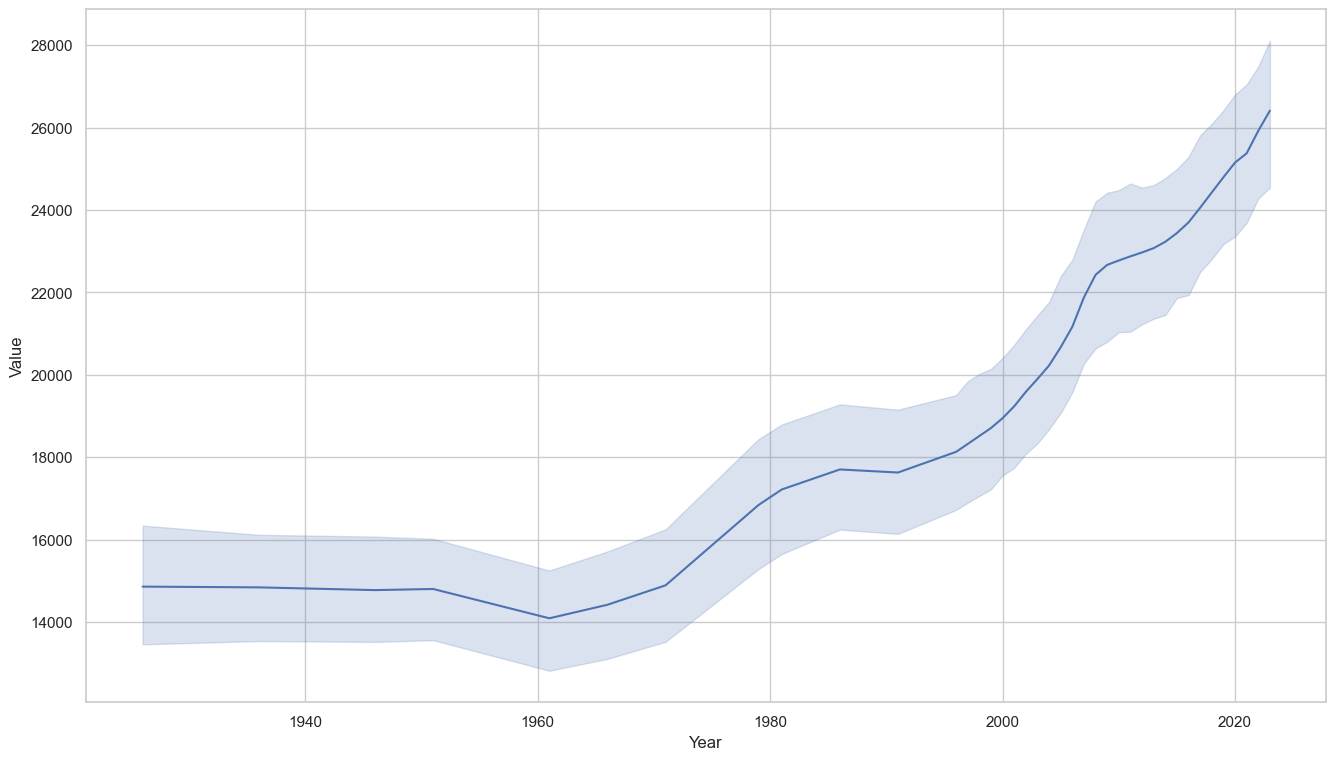

In [79]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x ='Year', y = 'Value', data = df3);

# RANDOM FOREST

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import StandardScaler

# Load the libraries

In [108]:
df3.head(5)

,Year,Value,Sex_Encoded,Single_Year_of_Age_Encoded
4,1926,28084,1,99
5,1926,27307,0,99
7,1926,28374,1,0
8,1926,27502,0,0
10,1926,29728,1,11


In [109]:
y = df3["Value"]
X = df3.drop(["Value"], axis=1)

#choose the dependent and independent variable

In [110]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
# X_train, X_test

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(X_train, y_train)

# Split the data set into Training and Testing parts
# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)

RandomForestClassifier(max_depth=3, random_state=42)

In [114]:
accuracy = rf.score(X_test,y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.000641025641025641
